Text(0.5, 1.0, 'X')

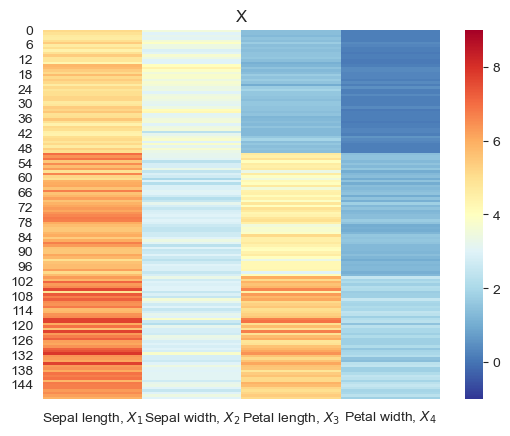

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris data
iris_sns = sns.load_dataset("iris", cache=False, data_home='./data/seaborn_data')
# A copy from Seaborn
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$',
                 'Petal length, $X_3$', 'Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

plt.close('all')

# Visualize the heatmap of X

fig, ax = plt.subplots()
ax = sns.heatmap(X_df,
                 cmap='RdYlBu_r',
                 xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=9)
plt.title('X')


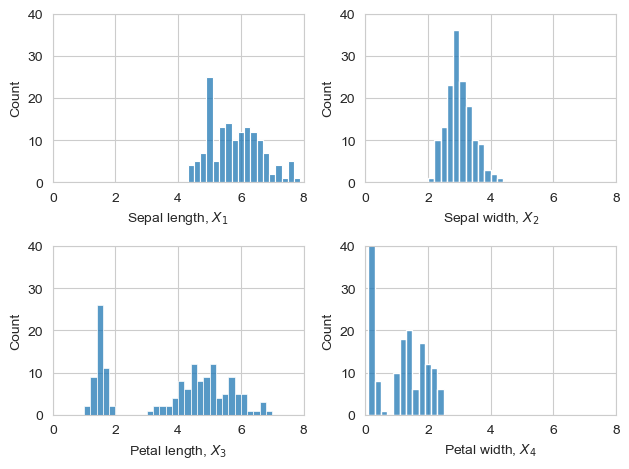

In [2]:
fig, axes = plt.subplots(2, 2)

sns.histplot(data=X_df, x=feature_names[0], binwidth=0.2, ax=axes[0][0])
axes[0][0].set_xlim([0, 8]);
axes[0][0].set_ylim([0, 40])
sns.histplot(data=X_df, x=feature_names[1], binwidth=0.2, ax=axes[0][1])
axes[0][1].set_xlim([0, 8]);
axes[0][1].set_ylim([0, 40])
sns.histplot(data=X_df, x=feature_names[2], binwidth=0.2, ax=axes[1][0])
axes[1][0].set_xlim([0, 8]);
axes[1][0].set_ylim([0, 40])
sns.histplot(data=X_df, x=feature_names[3], binwidth=0.2, ax=axes[1][1])
axes[1][1].set_xlim([0, 8]);
axes[1][1].set_ylim([0, 40])

plt.tight_layout()


<Axes: ylabel='Density'>

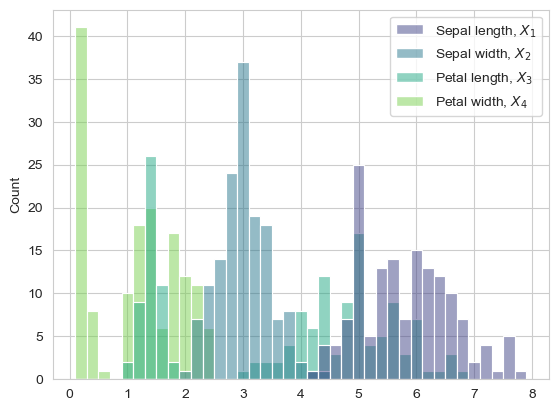

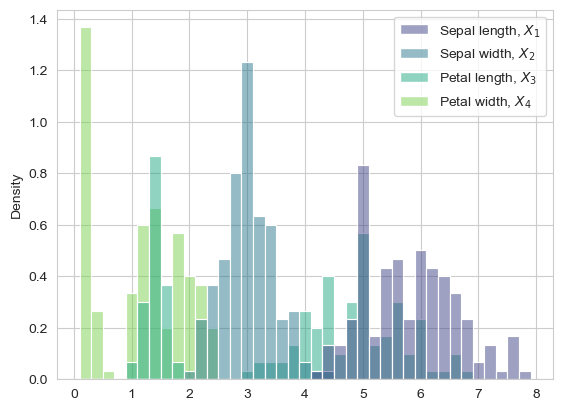

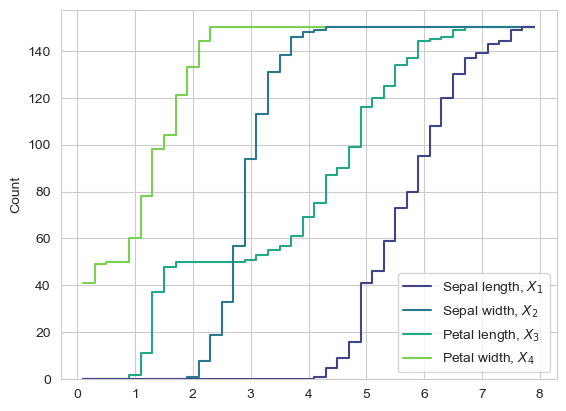

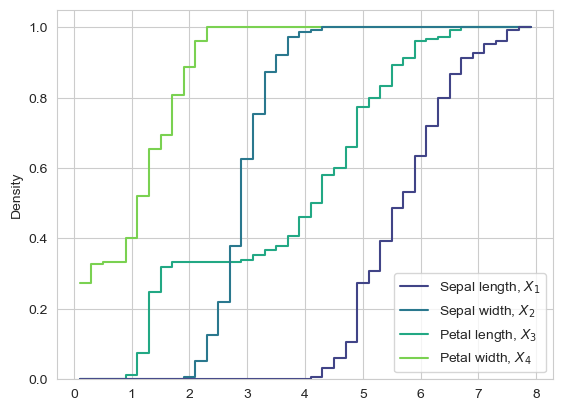

In [6]:
fig, ax = plt.subplots()

sns.histplot(data=X_df, palette="viridis", binwidth=0.2)
# palette 设置调色板

fig, ax = plt.subplots()

sns.histplot(data=X_df, palette="viridis", binwidth=0.2,
             stat="density", common_norm=False)
# stat 纵轴的值的表示密度

# 绘制累计分布函数的阶梯图
# element="step", cumulative=True
fig, ax = plt.subplots()

sns.histplot(data=X_df, palette="viridis", fill=False,
             binwidth=0.2, element="step",
             cumulative=True, common_norm=False)

fig, ax = plt.subplots()

sns.histplot(data=X_df, palette="viridis", fill=False,
             binwidth=0.2, element="step", stat="density",
             cumulative=True, common_norm=False)


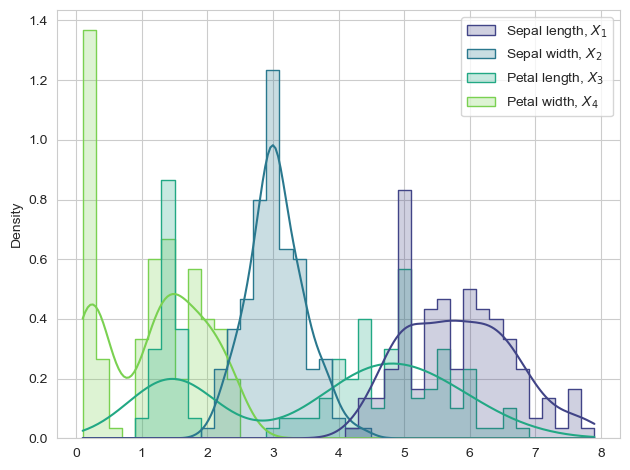

In [8]:
fig, ax = plt.subplots()

# 当 element="poly" 时，Seaborn 会通过在每个直方图条之间绘制多边形来表示数据的分布形状
sns.histplot(data=X_df, palette="viridis", fill=False,
             binwidth=0.2, element="poly", stat="density", common_norm=False)

fig, ax = plt.subplots()

sns.histplot(data=X_df, palette="viridis", binwidth=0.2,
             element="step", kde=True, stat="density", common_norm=False)

plt.tight_layout()

fig, ax = plt.subplots()
sns.kdeplot(data=X_df, fill=True,
            common_norm=False,
            alpha=.3, linewidth=1,
            palette="viridis")

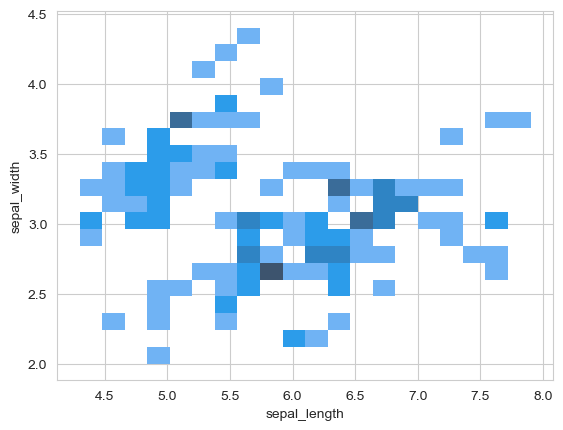

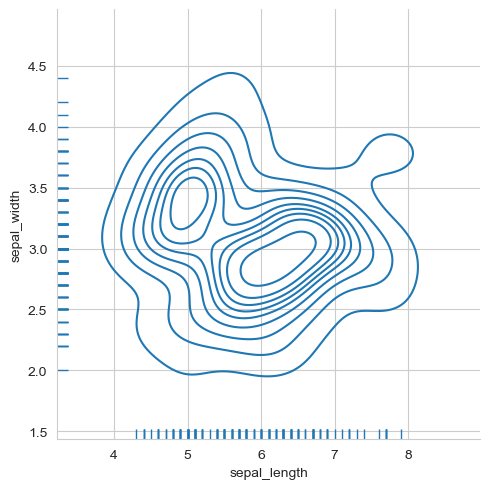

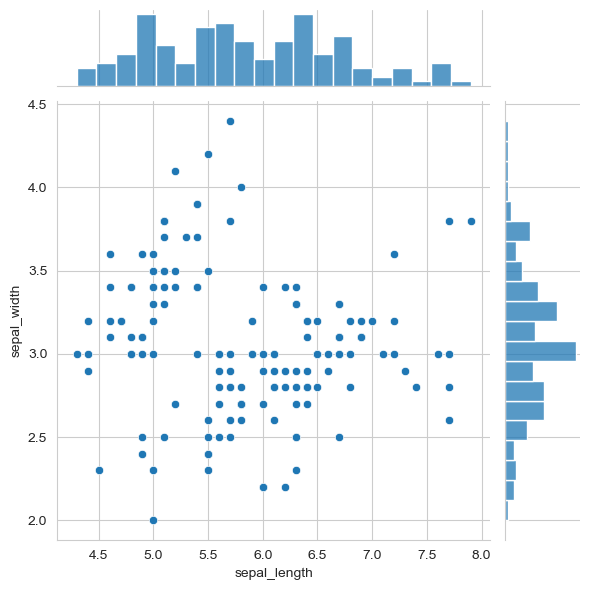

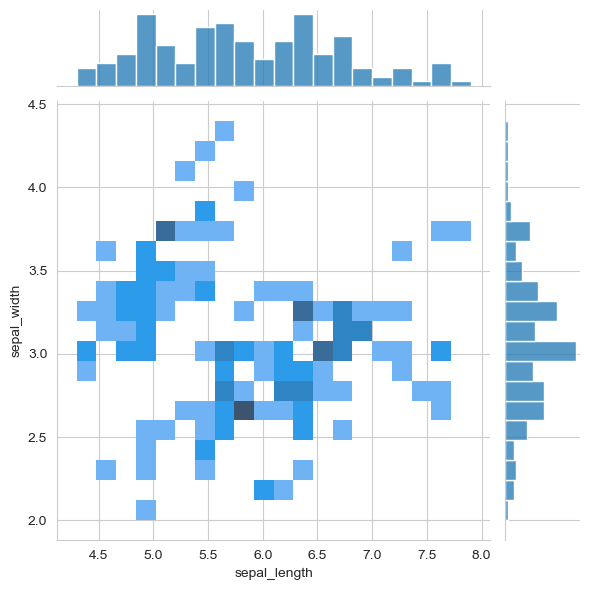

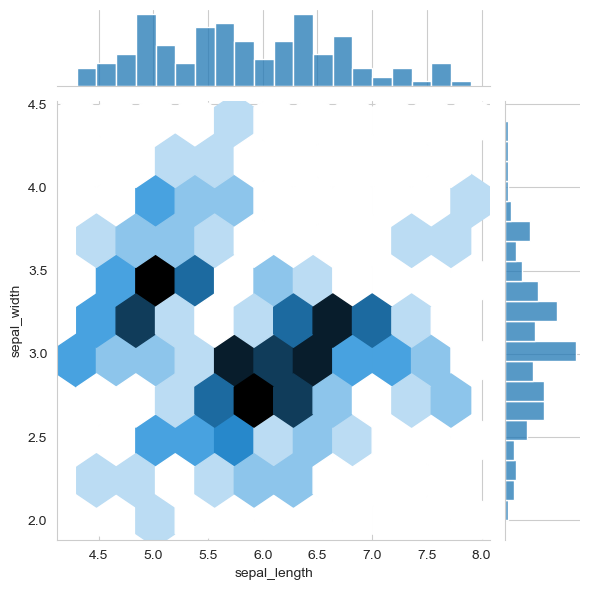

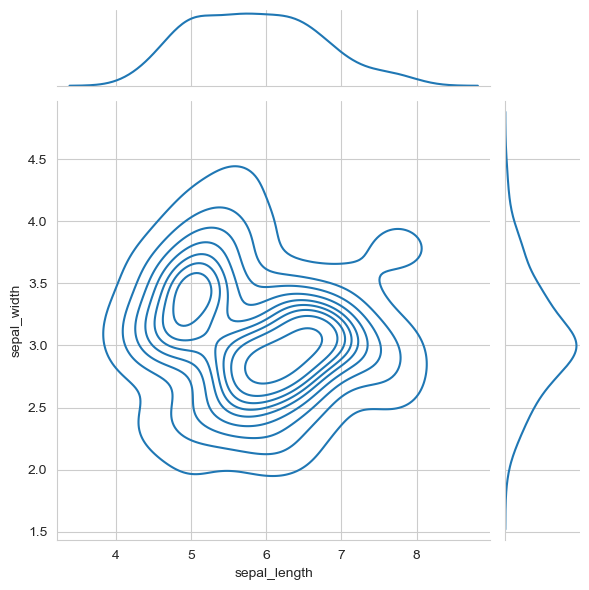

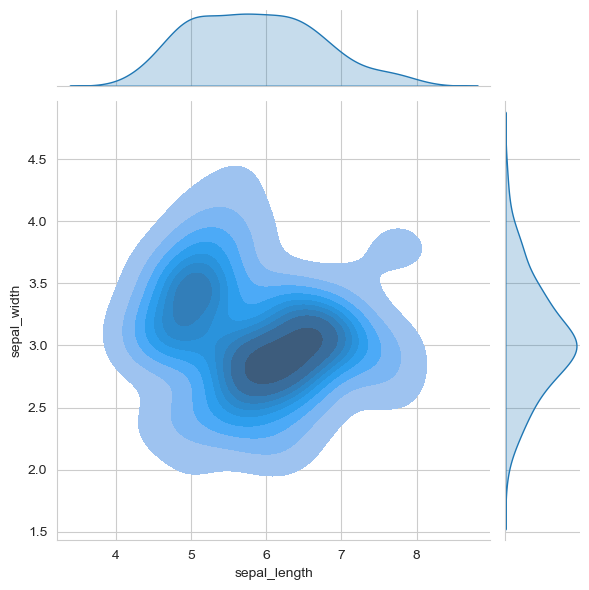

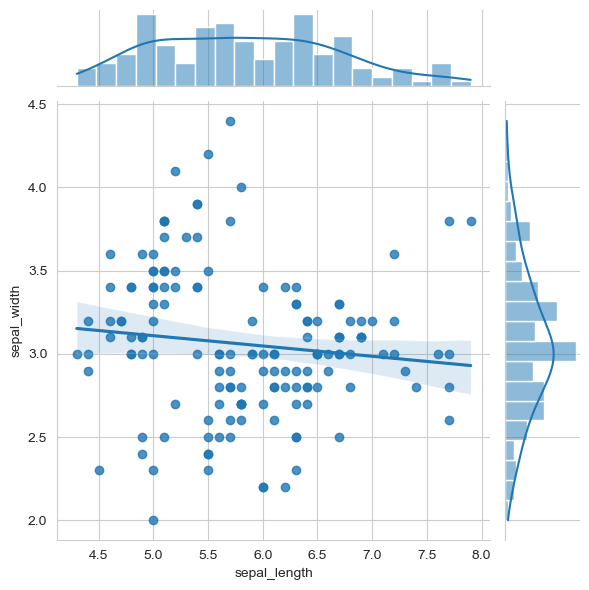

In [9]:
fig, ax = plt.subplots()
# 绘制直方图
sns.histplot(iris_sns, x="sepal_length", y="sepal_width", bins=20)

# 绘制数据分布图
sns.displot(iris_sns, x="sepal_length", y="sepal_width", kind="kde", rug=True)

# sns.jointplot() 绘制双变量关系图
# 散点图
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width",
              marginal_kws=dict(bins=20, fill=True))

# 直方图
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='hist', bins=20,
              marginal_kws=dict(bins=20, fill=True))

# 六边形图
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='hex', bins=20,
              marginal_kws=dict(bins=20, fill=True))

# 核密度估计图
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='kde')

# 核密度估计图
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='kde', fill=True)

# 散点图 + 回归拟合线
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='reg',
              marginal_kws=dict(bins=20, fill=True))



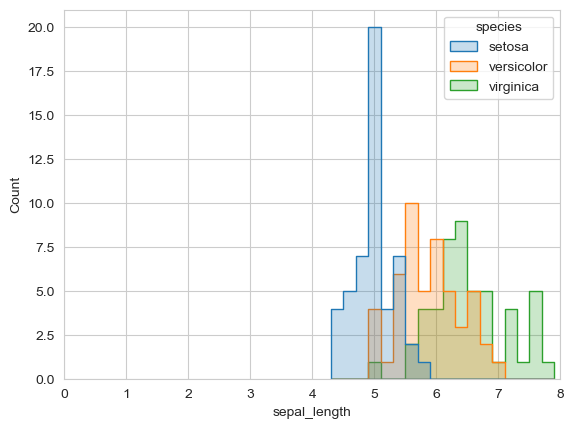

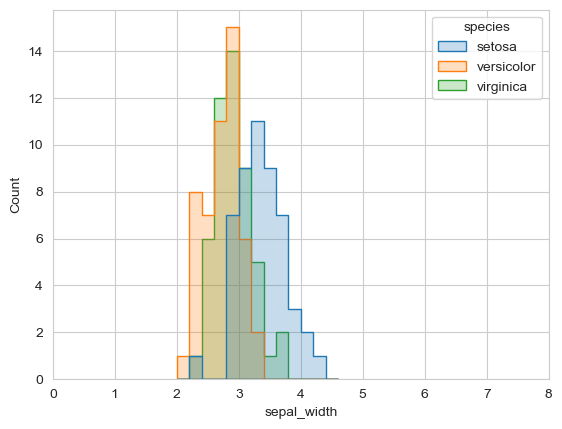

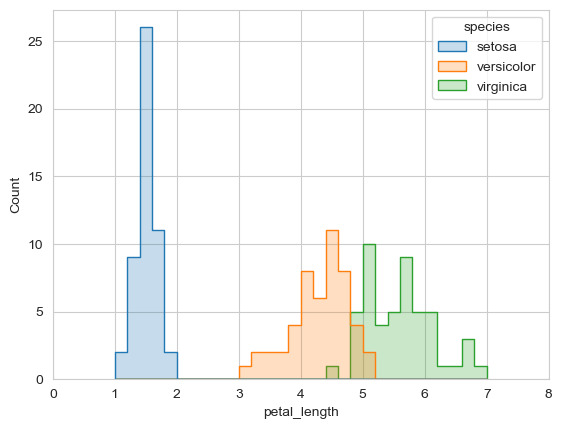

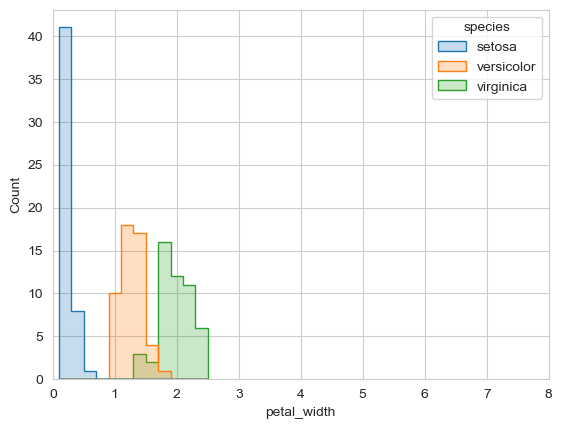

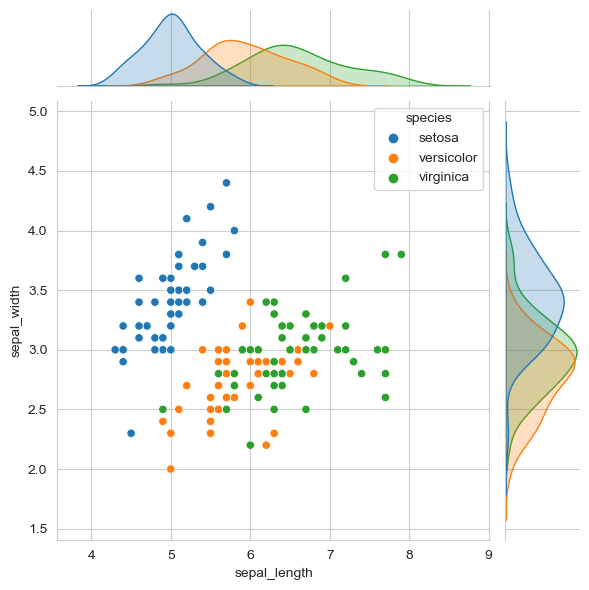

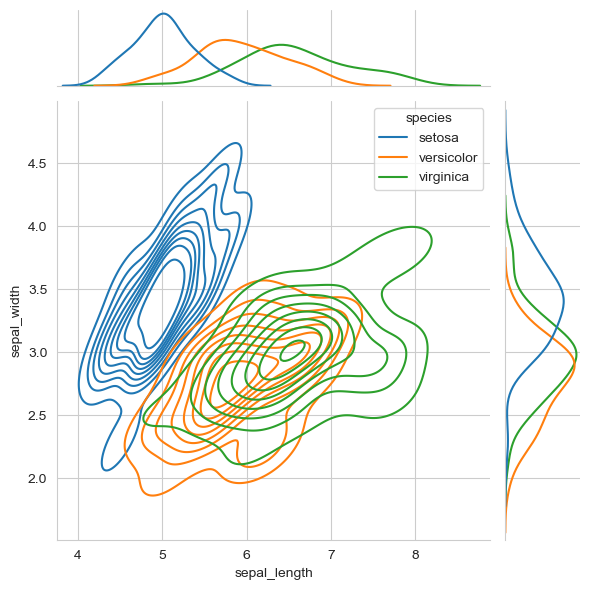

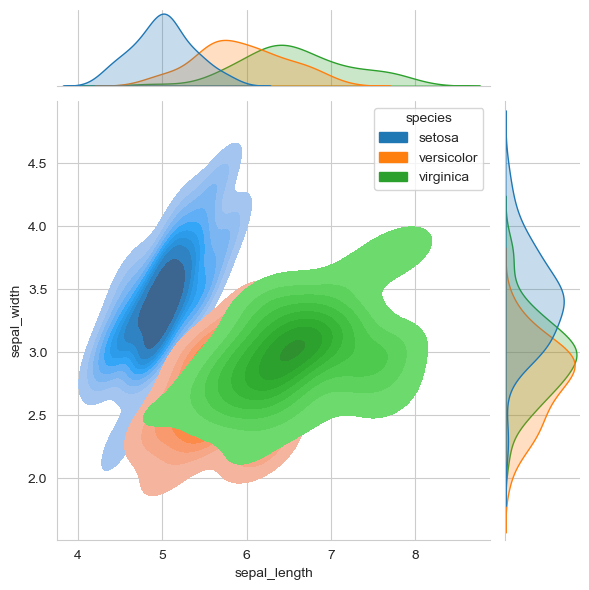

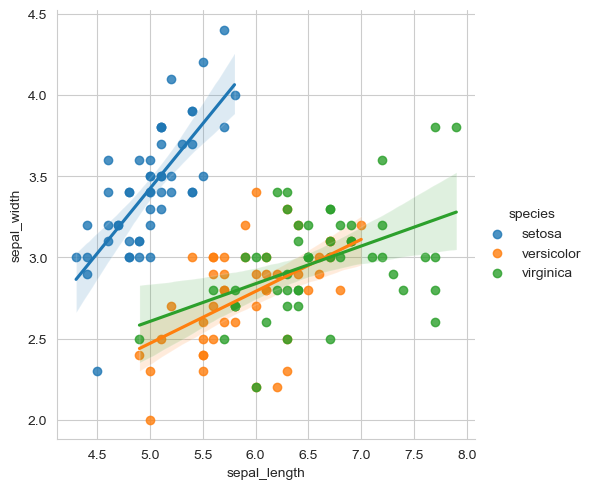

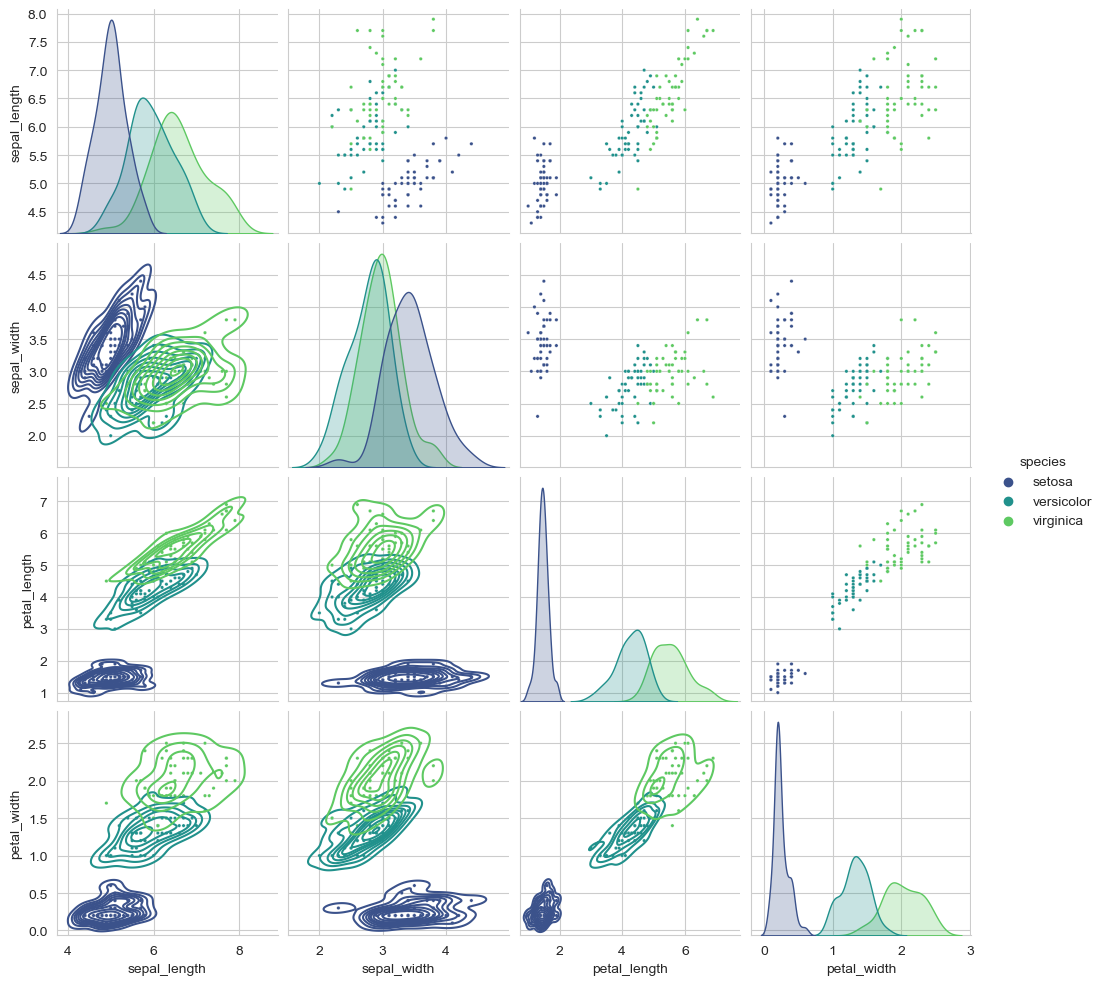

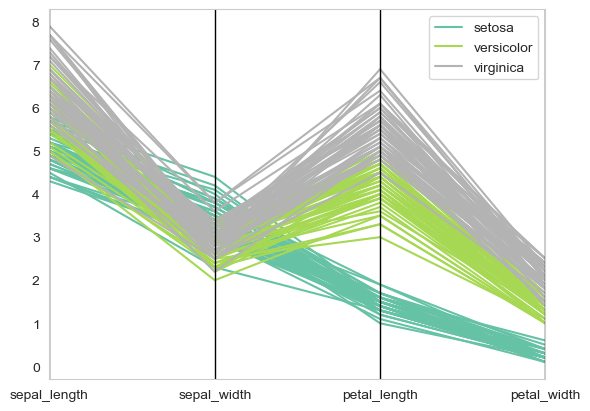

In [13]:
# # without class labels
# # 创建一个成对图
# g = sns.pairplot(iris_sns)
# # 上三角区域绘制散点图
# g.map_upper(sns.scatterplot, color='b')
# # 下三角区域绘制核密度估计图
# g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Blues_d")
# # 对角线上绘制一元分布图
# g.map_diag(sns.distplot, kde=False, color='b')

for i in [0, 1, 2, 3]:
    fig, ax = plt.subplots()
    sns.histplot(data=iris_sns, x=iris_sns.columns[i], hue="species",
                 binwidth=0.2, element="step")
    ax.set_xlim([0, 8])

sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species")

sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='kde', hue="species")

sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='kde', fill=True, hue="species")

# 使用 Seaborn 的 lmplot 函数创建散点图和回归线
sns.lmplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species")

# sns.lmplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species", col="species")

# with class labels
g = sns.pairplot(iris_sns, hue="species", plot_kws={"s": 6}, palette="viridis")
g.map_lower(sns.kdeplot)

fig, ax = plt.subplots()
# Make the plot
# 创建平行坐标图
pd.plotting.parallel_coordinates(iris_sns, 'species', colormap=plt.get_cmap("Set2"))
plt.show()


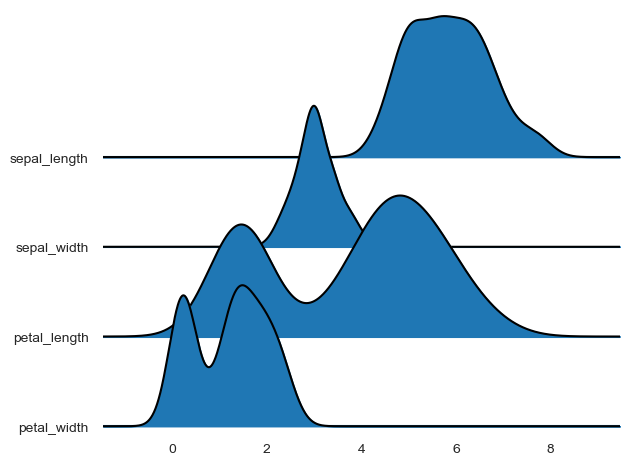

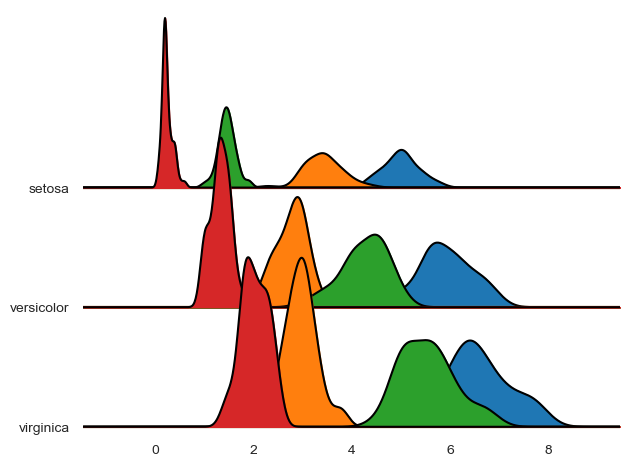

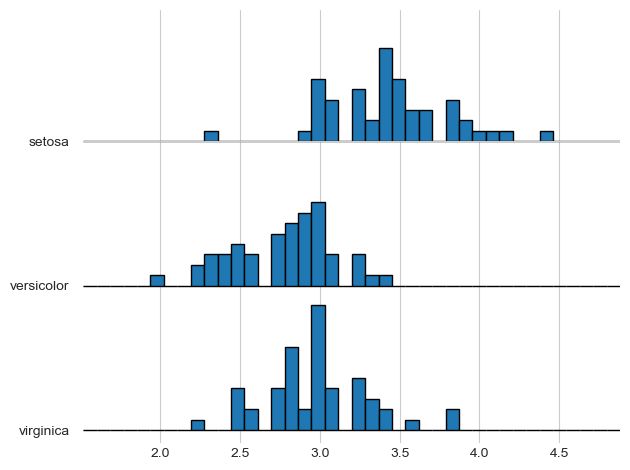

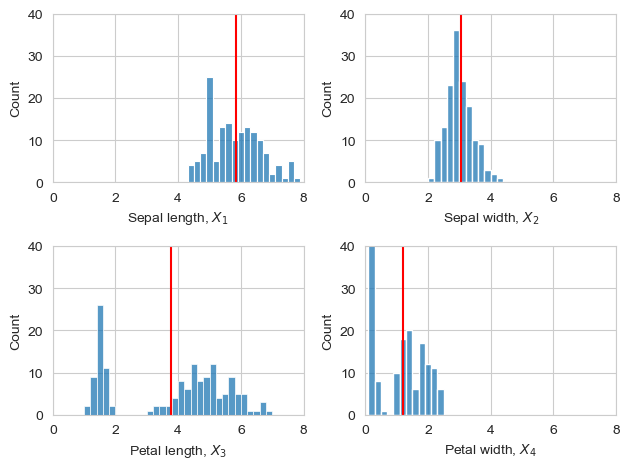

In [15]:
import joypy

# you might have to install joypy

joypy.joyplot(iris_sns, ylim='own')

joypy.joyplot(iris_sns, column=['sepal_length', 'sepal_width',
                                'petal_length', 'petal_width'],
              by="species", ylim='own')

joypy.joyplot(iris_sns, by="species", column="sepal_width",
              hist=True, bins=40, overlap=0, grid=True)

fig, axes = plt.subplots(2, 2)

sns.histplot(data=X_df, x=feature_names[0], binwidth=0.2, ax=axes[0][0])
axes[0][0].set_xlim([0, 8]);
axes[0][0].set_ylim([0, 40])
axes[0][0].vlines(x=X_df.mean()[feature_names[0]],
                  ymin=0, ymax=40, color='r')

sns.histplot(data=X_df, x=feature_names[1], binwidth=0.2, ax=axes[0][1])
axes[0][1].set_xlim([0, 8]);
axes[0][1].set_ylim([0, 40])
axes[0][1].vlines(x=X_df.mean()[feature_names[1]],
                  ymin=0, ymax=40, color='r')

sns.histplot(data=X_df, x=feature_names[2], binwidth=0.2, ax=axes[1][0])
axes[1][0].set_xlim([0, 8]);
axes[1][0].set_ylim([0, 40])
axes[1][0].vlines(x=X_df.mean()[feature_names[2]],
                  ymin=0, ymax=40, color='r')

sns.histplot(data=X_df, x=feature_names[3], binwidth=0.2, ax=axes[1][1])
axes[1][1].set_xlim([0, 8]);
axes[1][1].set_ylim([0, 40])
axes[1][1].vlines(x=X_df.mean()[feature_names[3]],
                  ymin=0, ymax=40, color='r')

plt.tight_layout()



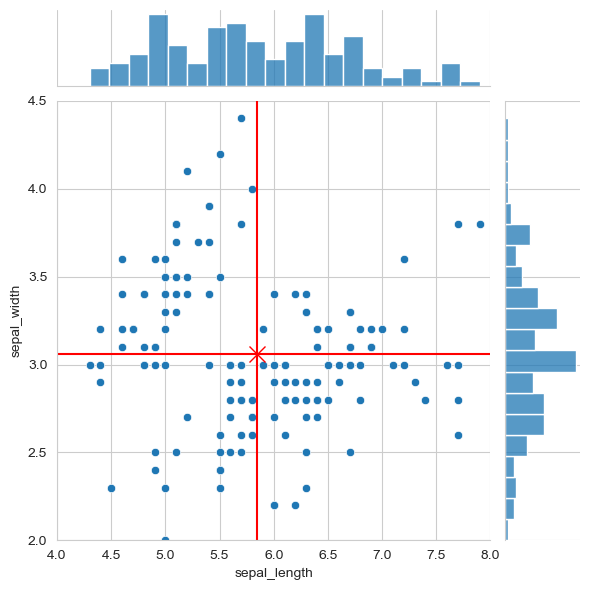

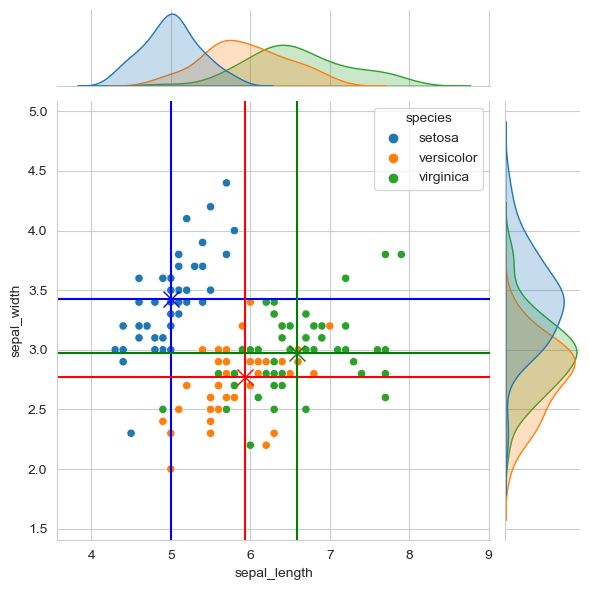

In [10]:
scatter_ax = sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width",
                           marginal_kws=dict(bins=20, fill=True))

scatter_ax.ax_joint.axvline(x=X_df.mean()[feature_names[0]], color='r')
scatter_ax.ax_joint.axhline(y=X_df.mean()[feature_names[1]], color='r')

scatter_ax.ax_joint.plot(X_df.mean()[feature_names[0]],
                         X_df.mean()[feature_names[1]],
                         marker='x', markersize='12',
                         color='r')
scatter_ax.ax_joint.set_xlim(4, 8)
scatter_ax.ax_joint.set_ylim(2, 4.5)

scatter_ax = sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species")

for label, color in zip(['setosa', 'versicolor', 'virginica'], ['b', 'r', 'g']):
    
    # 获取平均值
    mu_x1_class = iris_sns.loc[iris_sns['species'] == label, 'sepal_length'].mean()
    mu_x2_class = iris_sns.loc[iris_sns['species'] == label, 'sepal_width'].mean()

    scatter_ax.ax_joint.axvline(x=mu_x1_class, color=color)
    scatter_ax.ax_joint.axhline(y=mu_x2_class, color=color)
    scatter_ax.ax_joint.plot(mu_x1_class, mu_x2_class,
                             marker='x', markersize='12',
                             color=color)



       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
1%         4.400000     2.200000      1.149000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
99%        7.700000     4.151000      6.700000     2.500000
max        7.900000     4.400000      6.900000     2.500000


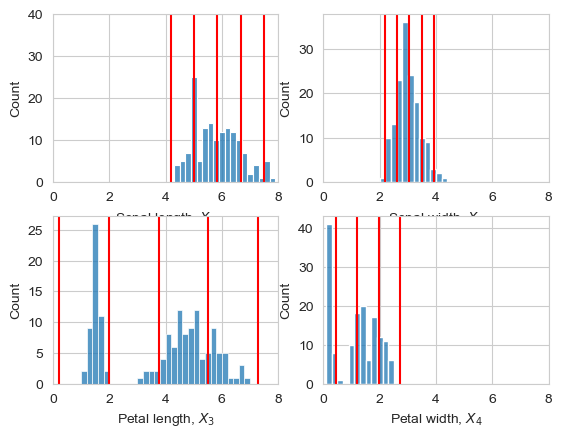

In [18]:
num = 0

fig, axes = plt.subplots(2, 2)

for i in [0, 1]:
    for j in [0, 1]:
        sns.histplot(data=X_df, x=feature_names[num], binwidth=0.2, ax=axes[i][j])
        axes[i][j].set_xlim([0, 8]);
        axes[0][0].set_ylim([0, 40])

        mu = X_df[feature_names[num]].mean()
        std = X_df[feature_names[num]].std()

        axes[i][j].axvline(x=mu, color='r')
        axes[i][j].axvline(x=mu - std, color='r')
        axes[i][j].axvline(x=mu + std, color='r')
        axes[i][j].axvline(x=mu - 2 * std, color='r')
        axes[i][j].axvline(x=mu + 2 * std, color='r')

        num = num + 1

# describe 方法用于生成关于数据集的描述性统计信息 percentiles 参数指定了要计算的百分位数
print(iris_sns.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))



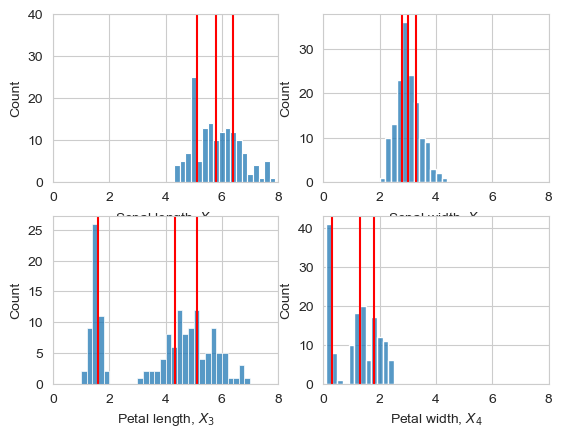

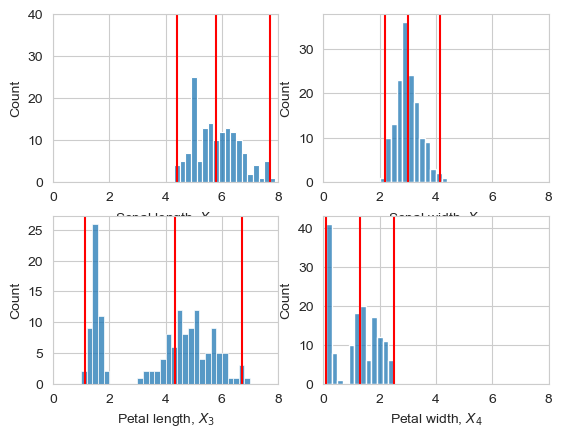

In [13]:
# visualize locations of three quartiles

num = 0

fig, axes = plt.subplots(2, 2)

for i in [0, 1]:
    for j in [0, 1]:
        sns.histplot(data=X_df, x=feature_names[num], binwidth=0.2, ax=axes[i][j])
        axes[i][j].set_xlim([0, 8]);
        axes[0][0].set_ylim([0, 40])

        q75, q50, q25 = np.percentile(X_df[feature_names[num]], [75, 50, 25])
        axes[i][j].axvline(x=q75, color='r')
        axes[i][j].axvline(x=q50, color='r')
        axes[i][j].axvline(x=q25, color='r')

        num = num + 1

# visualize two tails (1%, 99%)

num = 0
fig, axes = plt.subplots(2, 2)

for i in [0, 1]:
    for j in [0, 1]:
        sns.histplot(data=X_df, x=feature_names[num], binwidth=0.2, ax=axes[i][j])
        axes[i][j].set_xlim([0, 8]);
        axes[0][0].set_ylim([0, 40])

        q1, q50, q99 = np.percentile(X_df[feature_names[num]], [1, 50, 99])
        axes[i][j].axvline(x=q1, color='r')
        axes[i][j].axvline(x=q50, color='r')
        axes[i][j].axvline(x=q99, color='r')

        num = num + 1



D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the ma

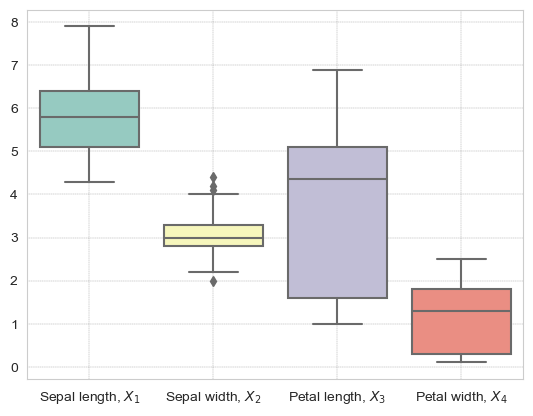

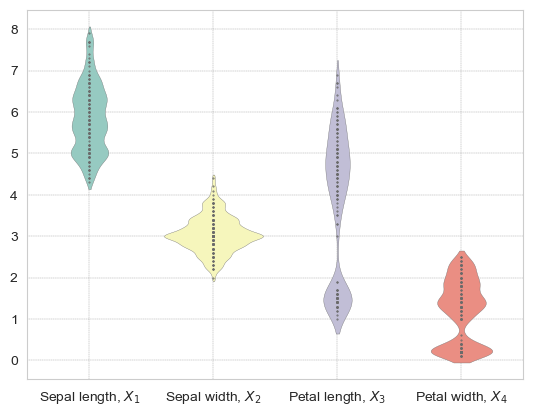

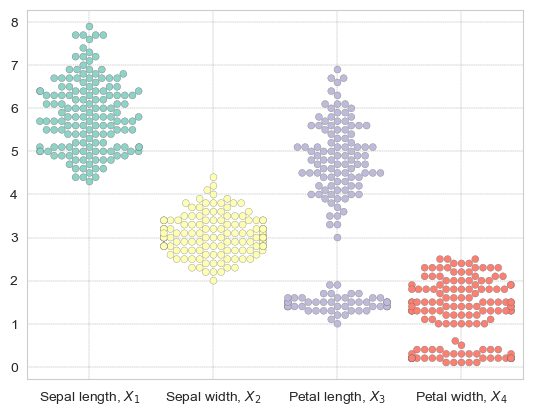

In [16]:
fig, ax = plt.subplots()
sns.boxplot(data=X_df, palette="Set3")
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])

fig, ax = plt.subplots()

sns.violinplot(data=X_df, palette="Set3", bw=.2,
               cut=1, linewidth=0.25, inner="points", orient="v")
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])

fig, ax = plt.subplots()

# 分布散点图
sns.swarmplot(data=X_df, palette="Set3",
              linewidth=0.25, orient="v")
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])


D:\miniconda\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.2'` for same effect.
  warnings.warn(msg, FutureWarning)
D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\miniconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.7% of the points cannot be placed; you may wan

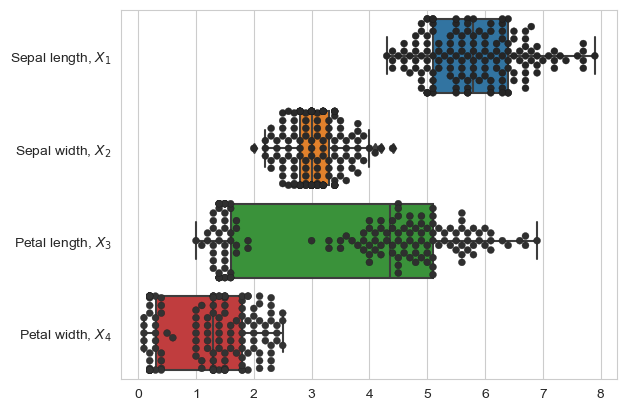

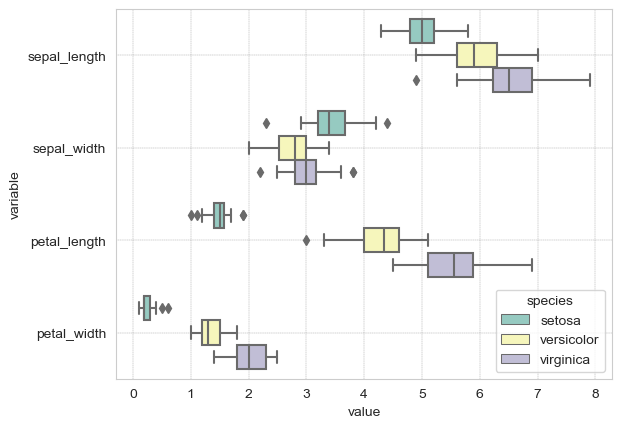

In [16]:
fig, ax = plt.subplots()

sns.boxplot(data=X_df, orient="h")
sns.swarmplot(data=X_df,
              linewidth=0.25, orient="h", color=".2")

# 宽格式变为长格式
iris_long = iris_sns.melt(id_vars=['species'])
fig, ax = plt.subplots()
sns.boxplot(data=iris_long, x="value", y="variable", orient="h",
            hue='species', palette="Set3")
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])


Sepal length, $X_1$    0.314911
Sepal width, $X_2$     0.318966
Petal length, $X_3$   -0.274884
Petal width, $X_4$    -0.102967
dtype: float64
Sepal length, $X_1$   -0.552064
Sepal width, $X_2$     0.228249
Petal length, $X_3$   -1.402103
Petal width, $X_4$    -1.340604
dtype: float64


Text(0.5, 1.0, 'Y = 2, virginica')

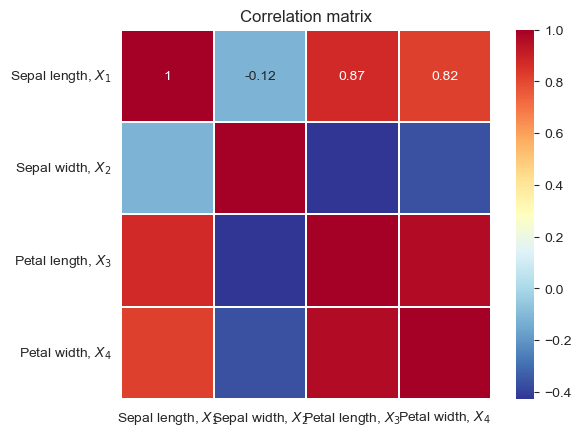

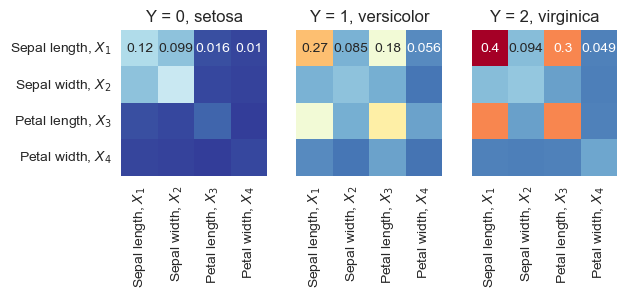

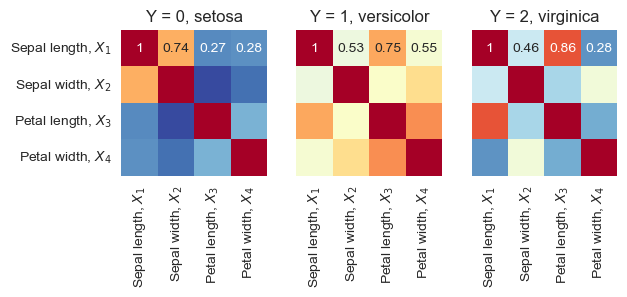

In [19]:
SIGMA = X_df.cov()

fig, axs = plt.subplots()

h = sns.heatmap(SIGMA, cmap='RdYlBu_r', linewidths=.05, annot=True)
h.set_aspect("equal")
h.set_title('Covariance matrix')

RHO = X_df.corr()

fig, axs = plt.subplots()

h = sns.heatmap(RHO, cmap='RdYlBu_r', linewidths=.05, annot=True)
h.set_aspect("equal")
h.set_title('Correlation matrix')

print(X_df.skew())
print(X_df.kurt())

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(X_df[y == 0].cov(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=0.4, vmin=0)
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(X_df[y == 1].cov(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=0.4, vmin=0)
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(X_df[y == 2].cov(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=0.4, vmin=0)
ax3.set_title('Y = 2, virginica')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(X_df[y == 0].corr(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=1, vmin=0.15)
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(X_df[y == 1].corr(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=1, vmin=0.15)
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(X_df[y == 2].corr(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=1, vmin=0.15)
ax3.set_title('Y = 2, virginica')